# Clustering Crypto

In [21]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

### Deliverable 1: Preprocessing the Data for PCA

In [2]:
# Load the crypto_data.csv dataset.
df = pd.read_csv('crypto_data.csv')
df.tail(10)
#df.count()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000
1251,PUNK,SteamPunk,PoS,False,PoS,NaN,40000000


In [3]:
# Keep all the cryptocurrencies that are being traded.

df = df[df.IsTrading] 
df.tail(20)


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
1225,UPX,uPlexa,CryptoNight,True,PoW,NaN,10500000000
1226,TCH,TigerCash,SHA-256,True,PoS,1.000000e+09,1000000000
1228,TIP,Tip Blockchain,DPoS,True,PoS,NaN,1000000000
1229,DTEP,DECOIN,X11,True,PoS,NaN,140000000
1230,WAVES,Waves,Leased POS,True,LPoS,1.000000e+08,100000000
1231,PART,Particl,PoS,True,PoS,9.283138e+06,8634140
1232,SLX,Slate,Slatechain,True,PoW,NaN,950000000
1234,BTT,BitTorrent,TRC10,True,DPoS,9.899887e+11,990000000000
1235,CHI,XAYA,NeoScrypt,True,PoW,NaN,77303932
1237,NXT,Nxt,PoS,True,PoS/LPoS,1.000000e+09,1000000000


In [4]:
# Keep all the cryptocurrencies that have a working algorithm.
df= df.dropna(subset=["Algorithm"]) 
df.shape

(1144, 7)

In [5]:
# Remove the "IsTrading" column. 
df.drop(['IsTrading'], axis=1, inplace=True)
df.shape


(1144, 6)

In [7]:
df = df.dropna()
df.shape

(685, 6)

In [8]:
# Keep the rows where coins are mined.
df.drop(df[df.TotalCoinsMined <= 0].index, inplace=True)
df.shape

(532, 6)

In [11]:
# Create a new DataFrame that holds only the cryptocurrencies names.
coins_name = pd.DataFrame(df["CoinName"], index=df.index)
coins_name.head()

,CoinName
0,42 Coin
2,404Coin
5,EliteCoin
7,Bitcoin
8,Ethereum


In [12]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
df.drop(columns=['CoinName'], inplace=True)
df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [13]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(df)
X.head()

,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Standardize the data with StandardScaler().
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-0.11710817 -0.0433963  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.0433963  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561 23.04343724 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11671506 -0.0433963  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11474682 -0.0433963  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


### Deliverable 2: Reducing Data Dimensions Using PCA

In [15]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)

In [18]:
# Create a DataFrame with the three principal components.
X_pca = pca.fit_transform(X_scaled)
pcs_df=pd.DataFrame(data=X_pca, columns=["PC 1", "PC 2", "PC 3"], index=df.index)
pcs_df.head()

,PC 1,PC 2,PC 3
0,-0.473361,-0.203238,0.127260
2,-0.506361,-0.137378,0.113566
5,0.296993,0.023144,0.459909
7,-0.115413,-0.280092,-0.371749
8,0.138403,-0.178152,-0.156036


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

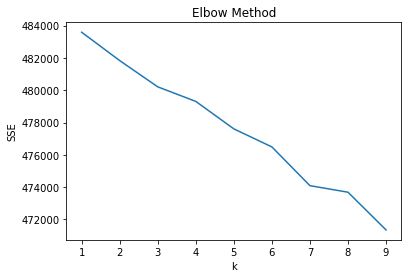

In [22]:
# Create an elbow curve to find the best value for K.
sse = {}
K = range(1, 10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


Running K-Means with `k=4`

In [ ]:
# Initialize the K-Means model.
# YOUR CODE HERE

# Fit the model
# YOUR CODE HERE

# Predict clusters
# YOUR CODE HERE

In [ ]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
# YOUR CODE HERE

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
# YOUR CODE HERE

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
# YOUR CODE HERE

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [ ]:
# Creating a 3D-Scatter with the PCA data and the clusters
# YOUR CODE HERE


In [ ]:
# Create a table with tradable cryptocurrencies.
# YOUR CODE HERE

In [ ]:
# Print the total number of tradable cryptocurrencies.
# YOUR CODE HERE

In [ ]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
# YOUR CODE HERE

In [ ]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
# YOUR CODE HERE

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
# YOUR CODE HERE

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
# YOUR CODE HERE

plot_df.head(10)

In [ ]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
# YOUR CODE HERE
